In [1]:
import pandas as pd
import numpy as np

In [2]:
#read cleaned data and text mining result
clean = pd.read_csv('./cleaned_data.csv')
text = pd.read_csv('./text_mining.csv')

In [3]:
clean.shape, text.shape

((33129, 39), (33129, 150))

In [4]:
scale = list(set(clean.columns)-set(['ID', 'Description']))
len(scale)

37

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clean[scale] = scaler.fit_transform(clean[scale])

In [6]:
clean.describe()

,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Nautical_Twilight_Night,Astronomical_Twilight_Night,cleaned_weather_fair,cleaned_weather_fog,cleaned_weather_other,cleaned_weather_rain,cleaned_weather_snow,cleaned_weather_storm,cleaned_weather_unknown,cleaned_weather_windy
count,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,...,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000,33129.000000
mean,0.661816,0.321844,0.013193,0.426598,0.647499,0.476726,0.911065,0.158413,0.004226,0.000694,...,0.243291,0.199010,0.456971,0.020586,0.000634,0.083160,0.000664,0.028344,0.019952,0.003109
std,0.161941,0.183842,0.031887,0.120610,0.245620,0.146263,0.227197,0.117995,0.028635,0.026340,...,0.429076,0.399262,0.498153,0.141997,0.025169,0.276128,0.025761,0.165955,0.139838,0.055673
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.647198,0.229572,0.000522,0.340909,0.450549,0.379592,1.000000,0.078947,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.712308,0.259193,0.006020,0.439394,0.670330,0.436735,1.000000,0.157895,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.747309,0.328688,0.015002,0.515152,0.879121,0.530612,1.000000,0.210526,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# data = clean.merge(text, left_index = True, right_index=True, how = 'left')
# data.shape

In [8]:
data = clean.copy()

In [9]:
data = data.set_index('ID')
data = data.drop(columns = ['Description'])

In [10]:
data.shape

(33129, 37)

### Feature selections

Boruta, Lasso, Mutual Information (Information Value), PCA

In [11]:
from boruta import BorutaPy

In [12]:
import sys
sys.path.append('./Code_V2/')
import public_func as base

In [13]:
output_folder = './chart/'
X = data.drop(columns = ['severity_binary'])
y = data.severity_binary

In [14]:
selected_features, rejected_features = base.Boruta_selection(X, y, ff_path=output_folder + f'boruta.png')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	36
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	26
I

In [15]:
rejected_features

['Wind_Speed(mph)',
 'Precipitation(in)',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'DayOfWeek',
 'Sunrise_Sunset_Night',
 'Civil_Twilight_Night',
 'Nautical_Twilight_Night',
 'Astronomical_Twilight_Night',
 'cleaned_weather_fair',
 'cleaned_weather_fog',
 'cleaned_weather_other',
 'cleaned_weather_rain',
 'cleaned_weather_snow',
 'cleaned_weather_storm',
 'cleaned_weather_unknown',
 'cleaned_weather_windy']

In [16]:
voting_table = pd.DataFrame(X.columns, columns=['Features'])
voting_table['Boruta'] = voting_table['Features'].isin(selected_features).astype(int)

In [17]:
voting_table.Boruta.value_counts()

Boruta
0    26
1    10
Name: count, dtype: int64

In [18]:
from sklearn.linear_model import Lasso

In [19]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X, y)
coefficients = lasso.coef_
print(coefficients)
feature_coefficient = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_coefficient = feature_coefficient[feature_coefficient['Coefficient'] != 0]
feature_coefficient = feature_coefficient.sort_values(by='Coefficient', ascending=False)
feature_coefficient.shape

[-7.07838556e-02 -1.49694065e-01 -7.27292227e-01  1.44375240e-01
  0.00000000e+00 -0.00000000e+00  3.64603767e-02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -2.97348307e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -4.11056988e-02 -0.00000000e+00  3.99046629e-02 -6.02375259e-01
  0.00000000e+00  0.00000000e+00  5.12529462e-04  0.00000000e+00
 -2.25080836e-03 -0.00000000e+00  0.00000000e+00 -3.82213857e-03
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


(12, 2)

In [20]:
voting_table['Lasso'] = voting_table['Features'].isin(feature_coefficient.Feature).astype(int)

In [21]:
voting_table.Lasso.value_counts()

Lasso
0    24
1    12
Name: count, dtype: int64

In [22]:
from sklearn.feature_selection import mutual_info_classif

In [23]:
X_columns = X.columns
np.random.seed(20250322)
mi_features = base.mutual_information_feature_selection(X, y, alpha = 0.001, feature_names = X_columns, ff_path = output_folder+'mi.png')

                    Feature  Mutual_Information
2              Distance(mi)            0.124409
23        accident_duration            0.118800
0                 Start_Lat            0.113826
1                 Start_Lng            0.112637
6            Visibility(mi)            0.007340
25     Civil_Twilight_Night            0.005696
4               Humidity(%)            0.005192
28     cleaned_weather_fair            0.004201
33    cleaned_weather_storm            0.003782
3            Temperature(F)            0.003103
5              Pressure(in)            0.002368
13                 Junction            0.002313
14                  No_Exit            0.002268
12                 Give_Way            0.002247
10                     Bump            0.001935
15                  Railway            0.001927
22                HourOfDay            0.001732
26  Nautical_Twilight_Night            0.001083
29      cleaned_weather_fog            0.001033


In [24]:
len(mi_features)

19

In [25]:
voting_table['MI'] = voting_table['Features'].isin(mi_features).astype(int)

In [26]:
voting_table.MI.value_counts()

MI
1    19
0    17
Name: count, dtype: int64

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
pca.fit(X)

explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio for each component:", explained_variance)

components = pca.components_

pca_df = pd.DataFrame(components, columns=X.columns)
print("PCA components (loadings):")
print(pca_df)

top_features = pca_df.iloc[0].abs().sort_values(ascending=False).head(15)
print("Top 5 features for the first principal component:", top_features)

Explained variance ratio for each component: [0.39514358 0.16178238]
PCA components (loadings):
   Start_Lat  Start_Lng  Distance(mi)  Temperature(F)  Humidity(%)  \
0   0.000647  -0.013638     -0.000957       -0.044749     0.092813   
1  -0.011411   0.021614     -0.000376       -0.005906    -0.233770   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)   Amenity  \
0     -0.008242       -0.018837        -0.027258           0.000926 -0.000242   
1      0.043947        0.204191        -0.018439          -0.010743 -0.000116   

   ...  Nautical_Twilight_Night  Astronomical_Twilight_Night  \
0  ...                 0.490339                     0.423978   
1  ...                 0.012384                     0.015426   

   cleaned_weather_fair  cleaned_weather_fog  cleaned_weather_other  \
0              0.016955             0.007509               -0.00026   
1              0.917056            -0.049827               -0.00127   

   cleaned_weather_rain  cleaned_weather_s

In [29]:
voting_table.fillna(0)
voting_table['total_selected'] = voting_table.Boruta + voting_table.Lasso + voting_table.MI

In [30]:
voting_table.total_selected.value_counts()

total_selected
0    15
1     8
3     7
2     6
Name: count, dtype: int64

In [31]:
selected = list(voting_table[voting_table.total_selected >=2].Features)

In [32]:
selected

['Start_Lat',
 'Start_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Junction',
 'Traffic_Signal',
 'HourOfDay',
 'accident_duration',
 'Nautical_Twilight_Night',
 'cleaned_weather_fair']

In [33]:
X = X[selected]

In [34]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20250322)

In [35]:
models = base.create_models()
base.training_models(X_train, X_test, y_train, y_test, 'num', './chart/')

----- Creating models --------
**** Logistic Regression ****
**** K-Nearest Neighbors (KNN) ****
**** Decision Trees ****
**** Random Forest ****
**** LightGBM ****
**** XGBoost ****
------------------------------------
----- Creating models --------
**** Logistic Regression ****
**** K-Nearest Neighbors (KNN) ****
**** Decision Trees ****
**** Random Forest ****
**** LightGBM ****
**** XGBoost ****
------------------------------------
----- Performing Logistic Regression --------
Elapsed time: 0.14 seconds
----- Performing KNN --------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ZhangSunnie/Documents/GT Master of Analytics/ISYE 7406/Project/Code_V2/public_func.py:361: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * precision * recall / (precision + recall)
/Users/ZhangSunnie/Documents/GT Master of Analytics/ISYE 7406/Project/Code_V2/public_func.py:357: RuntimeWarning: invalid value encountered in scalar divide
  precision = rri / sum(y_pred == 1)


Elapsed time: 2.83 seconds
----- Performing Decision Trees --------
Elapsed time: 0.08 seconds
----- Performing Random Forest --------
Elapsed time: 0.22 seconds
----- Performing LightGBM --------
Elapsed time: 0.49 seconds
----- Performing XGBoost --------
Elapsed time: 0.44 seconds


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Models:  ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'LightGBM', 'XGBoost']
Models:  ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'LightGBM', 'XGBoost']


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


Models:  ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'LightGBM', 'XGBoost']
Models:  ['Logistic Regression', 'KNN', 'Decision Trees', 'Random Forest', 'LightGBM', 'XGBoost']


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb


models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "XGBoost": xgb.XGBClassifier()}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1}

import pandas as pd
results_df = pd.DataFrame(results).T

print(results_df)

                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.637941   0.318692  0.741737  0.445830
KNN                  0.777845   0.350263  0.153728  0.213675
Decision Tree        0.813462   0.525692  0.511145  0.518316
Random Forest        0.846816   0.626102  0.545734  0.583162
LightGBM             0.891790   0.848449  0.546503  0.664797
XGBoost              0.879113   0.765393  0.554189  0.642889


In [37]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values(by='importance', ascending=False)

print(feat_imp_df.head(25))

                    feature  importance
10        accident_duration         539
1                 Start_Lng         483
2              Distance(mi)         401
0                 Start_Lat         390
5              Pressure(in)         293
3            Temperature(F)         254
9                 HourOfDay         238
4               Humidity(%)         211
11  Nautical_Twilight_Night          60
8            Traffic_Signal          47
6            Visibility(mi)          43
7                  Junction          21
12     cleaned_weather_fair          20


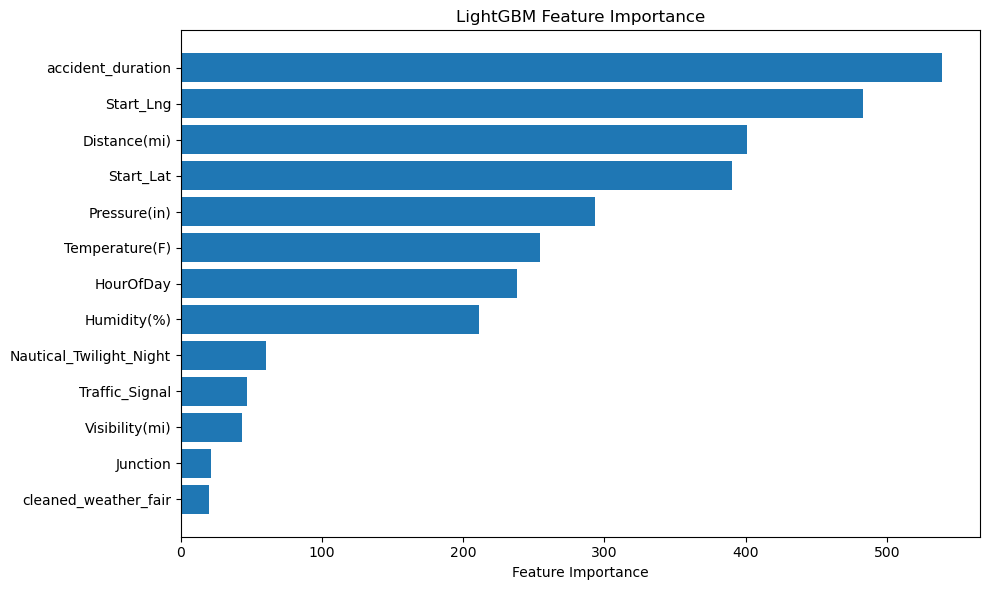

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['feature'], feat_imp_df['importance'])
plt.xlabel('Feature Importance')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()